# MNIST Data - Functional API

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train.astype(np.float32) / 255.0, X_test.astype(np.float32)/ 255.0

In [3]:
tf.keras.backend.clear_session()

input_obj = tf.keras.layers.Input(shape=(28,28))
flatten = tf.keras.layers.Flatten()(input_obj)
dense =  tf.keras.layers.Dense(128, activation='relu')(flatten)
output = tf.keras.layers.Dense(10)(dense)

model = tf.keras.models.Model(inputs=[input_obj], outputs=[output])

In [4]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, name="loss")
optimizer_fn = tf.keras.optimizers.Adam()
metrics_fn = tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy")

In [5]:
model.compile(optimizer=optimizer_fn,
              loss=loss_fn,
              metrics=metrics_fn)

In [6]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [7]:
tf_fit = model.fit(X_train, y_train, validation_split=0.1, epochs=5)

Epoch 1/5
1688/1688 [==============================] - 1s 719us/step - loss: 0.2752 - accuracy: 0.9214 - val_loss: 0.1224 - val_accuracy: 0.9678
Epoch 2/5
1688/1688 [==============================] - 1s 653us/step - loss: 0.1201 - accuracy: 0.9649 - val_loss: 0.0971 - val_accuracy: 0.9708
Epoch 3/5
1688/1688 [==============================] - 1s 644us/step - loss: 0.0829 - accuracy: 0.9756 - val_loss: 0.0816 - val_accuracy: 0.9745
Epoch 4/5
1688/1688 [==============================] - 1s 638us/step - loss: 0.0619 - accuracy: 0.9814 - val_loss: 0.0825 - val_accuracy: 0.9757
Epoch 5/5
1688/1688 [==============================] - 1s 645us/step - loss: 0.0477 - accuracy: 0.9856 - val_loss: 0.0850 - val_accuracy: 0.9778


In [8]:
for key, val in tf_fit.history.items():
    print( f'{key:20s}: {[ f"{i:3.2f}" for i in val]}')

loss                : ['0.28', '0.12', '0.08', '0.06', '0.05']
accuracy            : ['0.92', '0.96', '0.98', '0.98', '0.99']
val_loss            : ['0.12', '0.10', '0.08', '0.08', '0.09']
val_accuracy        : ['0.97', '0.97', '0.97', '0.98', '0.98']


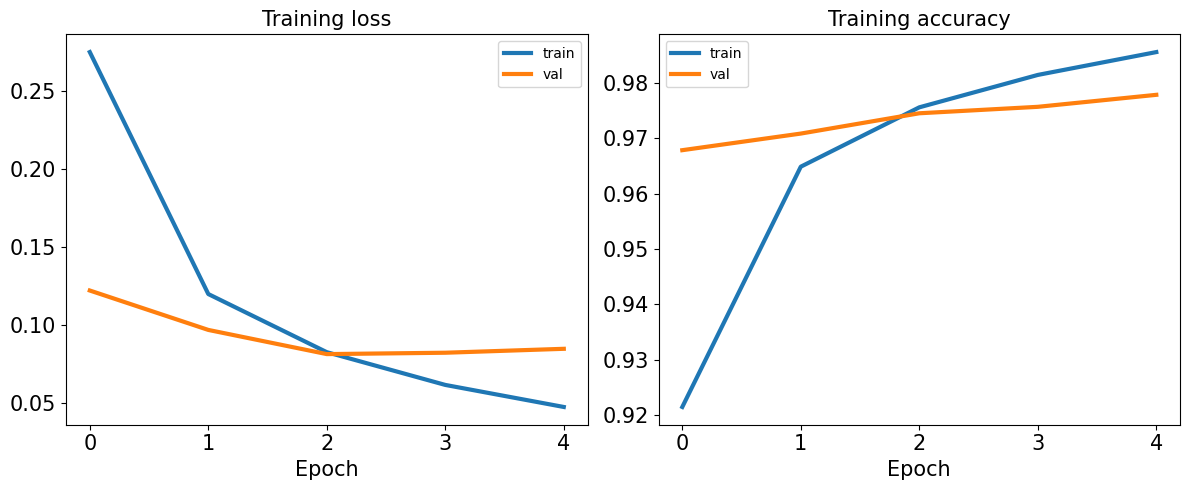

In [9]:
hist = tf_fit.history

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist['loss'], lw=3)
ax.plot(hist['val_loss'], lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(['train','val'])

ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['accuracy'], lw=3)
ax.plot(hist['val_accuracy'], lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
ax.legend(['train','val'])

#plt.savefig('mnist1.pdf')

plt.show()

- The `Model.evaluate` method checks the models performance.

In [10]:
model.evaluate(X_test,  y_test)

313/313 [==============================] - 0s 373us/step - loss: 0.0752 - accuracy: 0.9764


[0.07517373561859131, 0.9764000177383423]

In [11]:
y_hat = model(X_test)
print(y_hat.shape)
print(y_hat.numpy()[:2])

(10000, 10)
[[ -3.992171    -6.494623    -0.13762645   1.7559205  -13.846555
   -5.8318677  -15.532219    11.699243    -2.8783617   -1.9895229 ]
 [ -3.1085153    3.2226338   11.760217     0.07939877 -17.139402
   -1.5264804   -3.384456   -17.32209      0.16976902  -9.346933  ]]
